# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Again, I'll load the NSFG pregnancy file and select live births:

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

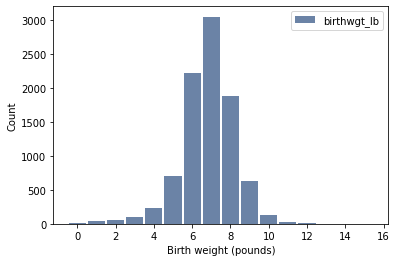

In [3]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

To normalize the disrtibution, we could divide through by the total count:

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

<BarContainer object of 16 artists>

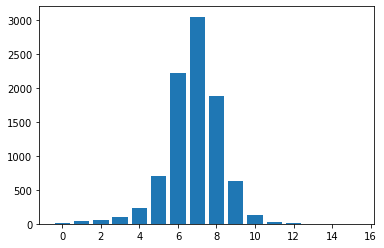

In [5]:
# Do above myself
bwgt = live.birthwgt_lb.value_counts().sort_index()

fig, ax = plt.subplots(1,1)

ax.bar(x = range(len(bwgt)), height = bwgt)

<BarContainer object of 80 artists>

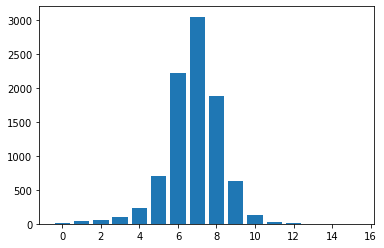

In [6]:
# Another way to do the same thing, simpler
valb,cntb = np.unique(live.birthwgt_lb, return_counts=True)

fig, ax = plt.subplots(1,1)

ax.bar(valb, cntb)

In [7]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

In [8]:
# Do above myself
rv = stats.rv_discrete(values=(bwgt.index, bwgt/bwgt.sum()))

The result is a Probability Mass Function (PMF).

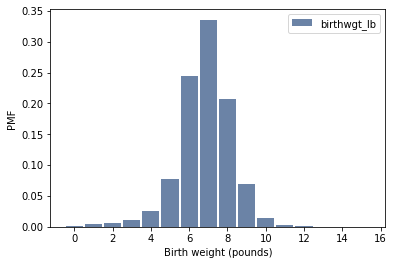

In [9]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

<BarContainer object of 16 artists>

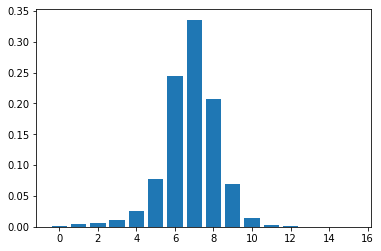

In [10]:
# Do above myself
fig, ax = plt.subplots(1,1)
ax.bar(x = rv.xk, height = rv.pk)

More directly, we can create a Pmf object.

In [11]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [12]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [13]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [14]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [15]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [16]:
pmf.Total()

0.8999999999999999

`Normalize` divides through by the total probability, making it 1 again.

In [17]:
pmf.Normalize()
pmf.Total()

1.0

In [18]:
# Use a stats rv to do all the above
rv2_data=np.array([1, 2, 2, 3, 5])
val, cnt = np.unique(rv2_data, return_counts=True)

rv2 = stats.rv_discrete(values=(val, cnt/cnt.sum()))
rv2.xk, rv2.pk

(array([1, 2, 3, 5]), array([0.2, 0.4, 0.2, 0.2]))

In [19]:
rv2.pmf(3)
# Cannot use indexing like rv2[3] though

0.2

In [20]:
# With stats rv can use loc and scale to do transformations, not sure why one would want to change individual elements
# In the case of discrete rv though scale is not a valid parameter
rv2_trans = rv2(loc=3)

In [21]:
# If loc is used, and then saved as a new variable, it is a frozen distribution object and 'xk','pk' can no longer be accessed
# Things like mean and std work though
rv2.mean(), rv2.std(), rv2_trans.mean(), rv2_trans.std()

(2.6, 1.3564659966250532, 5.6, 1.3564659966250532)

Here's the PMF of pregnancy length for live births.

In [22]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

In [23]:
# Mine
val3, cnt3 = np.unique(live.prglngth, return_counts=True)
prglngth_rv = stats.rv_discrete(values=(val3, cnt3/cnt3.sum()))

In [24]:
prglngth_rv.xk, prglngth_rv.pk

(array([ 0,  4,  9, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 50], dtype=int64),
 array([1.09313511e-04, 1.09313511e-04, 1.09313511e-04, 1.09313511e-04,
        2.18627022e-04, 1.09313511e-04, 1.09313511e-04, 1.09313511e-04,
        2.18627022e-04, 7.65194578e-04, 1.09313511e-04, 1.42107564e-03,
        3.27940533e-04, 3.82597289e-03, 3.27940533e-04, 3.49803236e-03,
        2.29558373e-03, 1.50852645e-02, 2.95146480e-03, 1.25710538e-02,
        5.35636205e-03, 6.55881067e-03, 3.39965020e-02, 3.50896371e-02,
        4.97376476e-02, 6.63533013e-02, 5.13008308e-01, 1.21993878e-01,
        6.41670310e-02, 3.58548317e-02, 1.61783997e-02, 5.02842151e-03,
        1.09313511e-03, 1.09313511e-04, 1.09313511e-04, 7.65194578e-04,
        2.18627022e-04]))

Here's what it looks like plotted with `Hist`, which makes a bar graph.

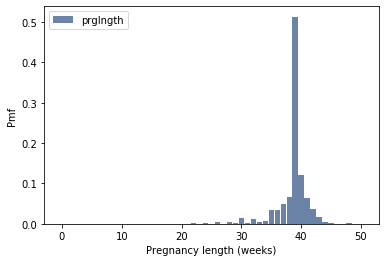

In [25]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

<BarContainer object of 37 artists>

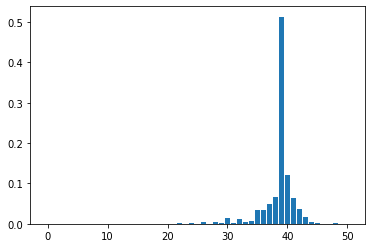

In [26]:
# Mine
fig, ax = plt.subplots(1,1)
ax.bar(prglngth_rv.xk, prglngth_rv.pk)

Here's what it looks like plotted with `Pmf`, which makes a step function.

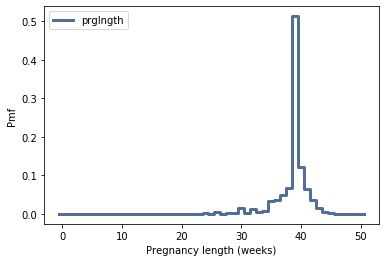

In [27]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

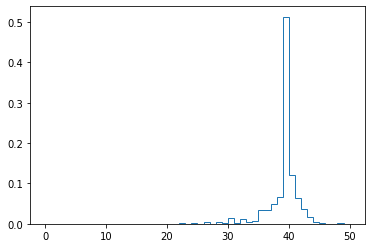

In [28]:
# Mine
fig, ax = plt.subplots(1,1)
ax.hist(live.prglngth, bins=np.arange(0,51), histtype='step', density=True)
plt.show()

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [29]:
live, firsts, others = first.MakeFrames()

In [30]:
# Mine, not necessary to actually run the code, but I would do this as below
# firsts = live[live.birthord == 1]
# others = live[live.birthord != 1]

Here are the distributions of pregnancy length.

In [31]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

In [32]:
# Mine
# Define a function for making these discrete random variables from an array of raw values
def discrtRV(data):
    '''
    data = an array of raw values
    returns a scipy.stats discrete_rv
    '''
    val, cnt = np.unique(data, return_counts=True)
    data_rv = stats.rv_discrete(values=(val, cnt/cnt.sum()))

    return(data_rv)

In [33]:
# Mine
firsts_rv = discrtRV(firsts.prglngth)
others_rv = discrtRV(others.prglngth)

In [34]:
# As found earlier the length of the x values is not the same in these two series
# So will need to use the bin centering method in call to hist I used in chapter 2 to get these aligned
len(firsts_rv.xk), len(others_rv.xk)

(31, 32)

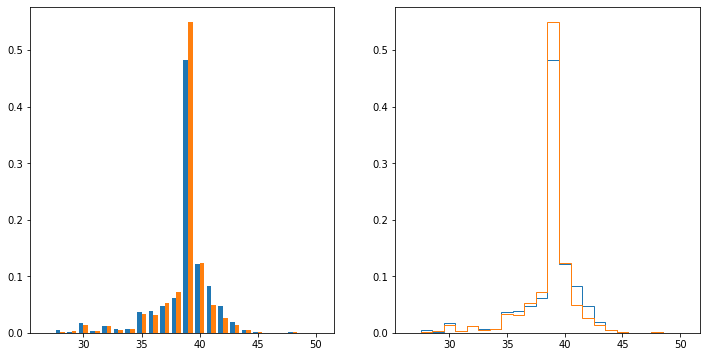

In [35]:
#Mine
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,6)

ax1.hist([firsts.prglngth, others.prglngth] , bins=np.arange(26.5,51.5,1), label=['firsts', 'others'], density=True)

ax2.hist(firsts.prglngth , bins=np.arange(26.5,51.5,1), label='firsts', histtype='step', density=True)
ax2.hist(others.prglngth , bins=np.arange(26.5,51.5,1), label='others', histtype='step', density=True)

plt.show()

And here's the code that replicates one of the figures in the chapter.

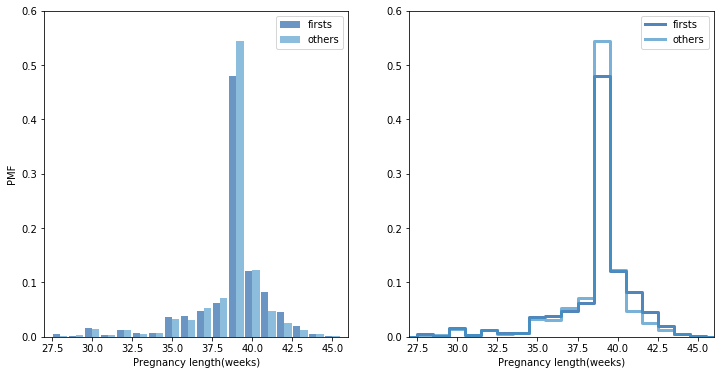

In [36]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

In [37]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [46]:
# Creating shared x values for my function
total = np.concatenate((firsts_rv.xk, others_rv.xk))
xk_min = total.min()
xk_max = total.max()
shared_xk = list(range(xk_min, xk_max+1))


In [49]:
# testing my function
def RvPmfDiffs(rv1,rv2):
    ''' Computes a shared range of values and the percentage point differences 
    between the pmfs of two scipy.stats discrete_rvs.
    
    Parameters

    rv1,rv2: two discrete_rvs

    Returns

    shared_xk: list
        A list of values from the minimum to maximum among all values from both input rvs

    diffs: list
        A list of the percentage point differences at each value in shared_xk for the rvs
    
    '''
    # Compute the the shared_xk values
    total = np.concatenate((rv1.xk, rv2.xk))
    xk_min = total.min()
    xk_max = total.max()
    shared_xk = list(range(xk_min, xk_max+1))
        
    # Compute the percentage point differences at each value in shared_xk
    diffs = []
    
    for x in shared_xk:
        p1 = rv1.pmf(x)
        p2 = rv2.pmf(x)
        diff = (p1-p2)*100
        diffs.append(diff)
    
    return shared_xk, diffs

(35, 45)

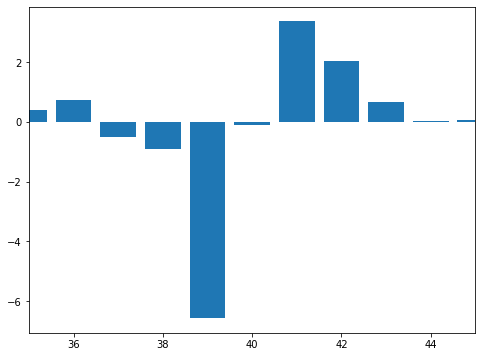

In [52]:
x_test, diffs_test = RvPmfDiffs(firsts_rv, others_rv)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.bar(x_test, diffs_test)

ax.set_xlim(35,45)

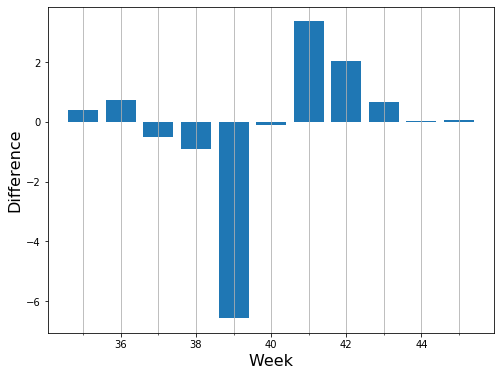

In [37]:
# Mine
weeks = range(35,46)
diffs = []

for week in weeks:
    p1 = firsts_rv.pmf(week)
    p2 = others_rv.pmf(week)
    diff = (p1-p2)*100
    diffs.append(diff)
    
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.bar(weeks, diffs)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel('Week', size=16)
ax.set_ylabel('Difference', size=16)
# to set rotation with OO approach ax.tick_params(axis='x', rotation=45)
ax.grid(True, axis='x', which='both')

plt.show()

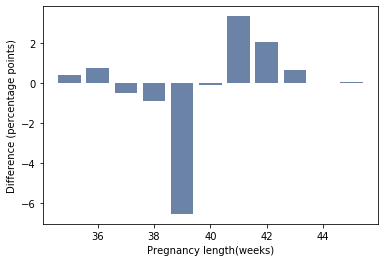

In [38]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [39]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

In [40]:
# Mine
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

vals = list(d.keys())
probs = [x/sum(list(d.values())) for x in list(d.values())]

class_rv = stats.rv_discrete(values=(vals, probs))

In [41]:
class_rv.mean()

23.692307692307693

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [42]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [43]:
# Mine
def biasRV(rv):
    new_probs = []
    for x in rv.xk:
        prob = rv.pmf(x)*x
        new_probs.append(prob)
    new_pk = np.array(new_probs)/sum(new_probs)
    return stats.rv_discrete(values=(rv.xk, new_pk))

In [44]:
new_class_rv = biasRV(class_rv)

In [45]:
new_class_rv.pk

array([0.03636364, 0.06233766, 0.15454545, 0.05714286, 0.10519481,
       0.24935065, 0.19220779, 0.08181818, 0.06103896])

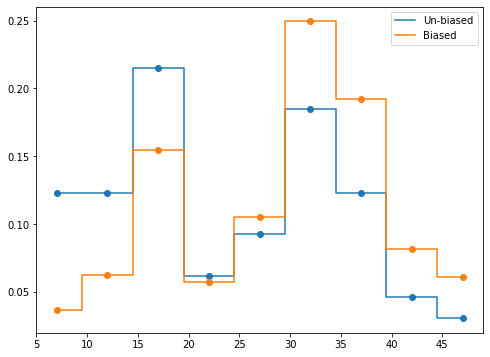

In [46]:
# Mine - step plots!
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.step(class_rv.xk, class_rv.pk, where='mid', label='Un-biased')
ax.plot(class_rv.xk, class_rv.pk, 'C0o')
ax.step(new_class_rv.xk, new_class_rv.pk, where='mid', label='Biased')
ax.plot(new_class_rv.xk, new_class_rv.pk, 'C1o')

ax.legend()

plt.show()

The following graph shows the difference between the actual and observed distributions.

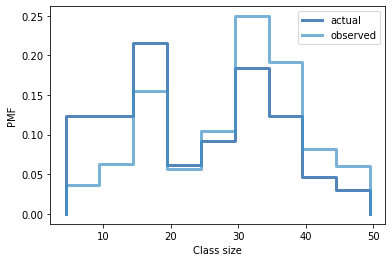

In [47]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [48]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


In [49]:
#Mine
class_rv.mean(), new_class_rv.mean()

(23.692307692307693, 29.123376623376622)

If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [50]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [51]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


In [52]:
# Mine
def unBiasRV(rv):
    new_probs = []
    for x in rv.xk:
        prob = rv.pmf(x)*1/x
        new_probs.append(prob)
    new_pk = np.array(new_probs)/sum(new_probs)
    return stats.rv_discrete(values=(rv.xk, new_pk))

In [53]:
unBiasedRV = unBiasRV(new_class_rv)
unBiasedRV.mean()

23.692307692307686

And plot the two distributions to confirm they are the same.

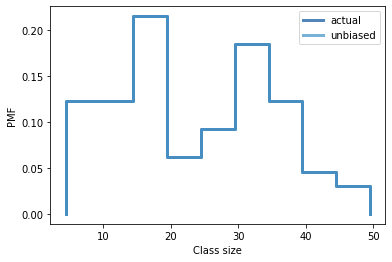

In [54]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

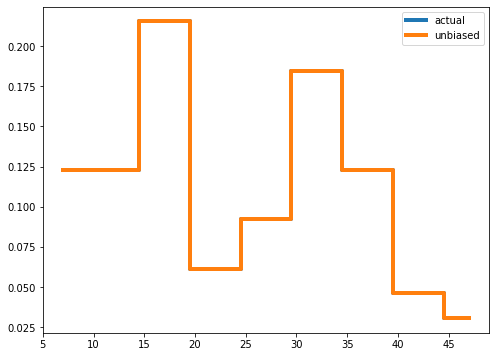

In [55]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.step(class_rv.xk, class_rv.pk, where='mid', label='actual', lw=4)
ax.step(unBiasedRV.xk, unBiasedRV.pk, where='mid', label='unbiased', lw=4)

ax.legend()

plt.show()

### Pandas indexing

Here's an example of a small DataFrame.

In [56]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,0.845516,0.017167
1,-1.752196,1.049059
2,0.303176,-0.696551
3,1.316554,2.290076


We can specify column names when we create the DataFrame:

In [57]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.845516,0.017167
1,-1.752196,1.049059
2,0.303176,-0.696551
3,1.316554,2.290076


We can also specify an index that contains labels for the rows.

In [58]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.845516,0.017167
b,-1.752196,1.049059
c,0.303176,-0.696551
d,1.316554,2.290076


Normal indexing selects columns.

In [59]:
df['A']

a    0.845516
b   -1.752196
c    0.303176
d    1.316554
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [60]:
df.loc['a']

A    0.845516
B    0.017167
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [61]:
df.iloc[0]

A    0.845516
B    0.017167
Name: a, dtype: float64

`loc` can also take a list of labels.

In [62]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.845516,0.017167
c,0.303176,-0.696551


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [63]:
df['a':'c']

,A,B
a,0.845516,0.017167
b,-1.752196,1.049059
c,0.303176,-0.696551


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [64]:
df[0:2]

,A,B
a,0.845516,0.017167
b,-1.752196,1.049059


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [65]:
resp = nsfg.ReadFemResp()

In [66]:
val, cnt = np.unique(resp.numkdhh, return_counts=True)
numkidsRV = stats.rv_discrete(values=(val,cnt/cnt.sum()))
# could have also used the function I defined above for constructing these: discrtRV

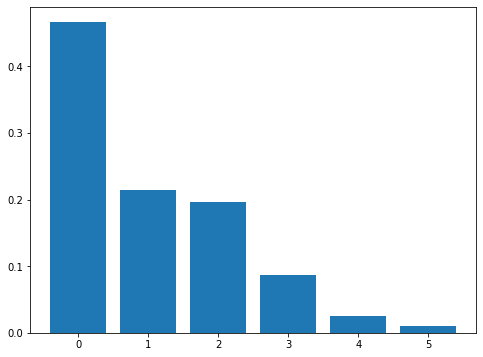

In [67]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.bar(numkidsRV.xk, numkidsRV.pk)

plt.show()

In [68]:
biasKidsRV = biasRV(numkidsRV)

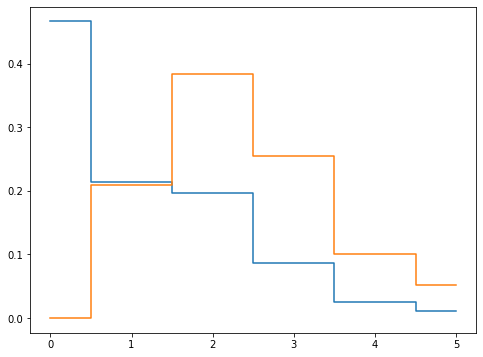

In [69]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.step(numkidsRV.xk, numkidsRV.pk, where='mid')
ax.step(biasKidsRV.xk, biasKidsRV.pk, where='mid')

plt.show()

In [70]:
numkidsRV.mean(), biasKidsRV.mean()

(1.024205155043831, 2.403679100664282)

In [71]:
# Solution goes here

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [72]:
live, firsts, others = first.MakeFrames()

In [73]:
preg_map = nsfg.MakePregMap(live)

In [74]:
# Make my own preg_map
from collections import defaultdict

In [75]:
my_preg_map = defaultdict(list)

for index, caseid in live.caseid.iteritems():
    my_preg_map[caseid].append(index)

In [76]:
multi_preg_ids = []

for k,v in my_preg_map.items():
    if len(v) > 1:
        multi_preg_ids.append(k)
len(my_preg_map), len(multi_preg_ids)

(4413, 2874)

In [77]:
multi_firsts = firsts[firsts.caseid.isin(multi_preg_ids)]
multi_others = others[others.caseid.isin(multi_preg_ids)]
len(multi_firsts), len(multi_others), len(multi_others.caseid.unique())

(2874, 4735, 2874)

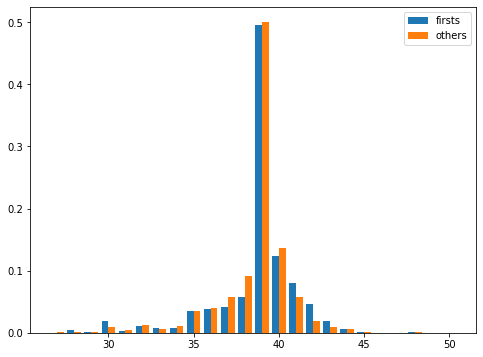

In [78]:
# Just trying out plotting a histogram first. The answer to the question comes below.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8,6)

ax.hist([multi_firsts.prglngth, multi_others.groupby(by='caseid').prglngth.mean()],
         bins=np.arange(26.5,51.5,1), label=['firsts', 'others'], density=True)

ax.legend()

plt.show()

In [79]:
# Compute the pmfs

multi_firsts_rv = discrtRV(multi_firsts.prglngth)
multi_others_rv = discrtRV(multi_others.groupby(by='caseid').prglngth.mean().round().astype(int))
# Need to round mean of others and convert to int to use in plotting

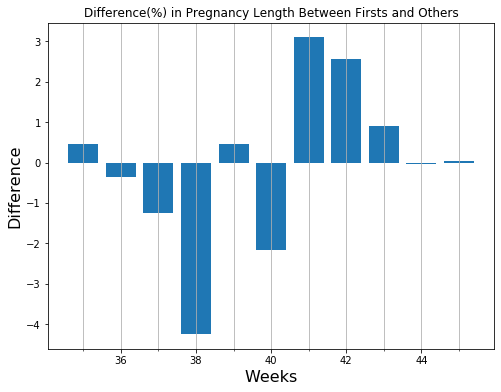

In [80]:
# Plot the differences
# Mine is not really the right solution, in comparison with what the question is specifically asking and the book's solution

weeks = range(35,46)
diffs = []

for week in weeks:
    p1 = multi_firsts_rv.pmf(week)
    p2 = multi_others_rv.pmf(week)
    diff = (p1-p2)*100
    diffs.append(diff)
    
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.bar(weeks, diffs)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel('Weeks', size=16)
ax.set_ylabel('Difference', size=16)
ax.set_title('Difference(%) in Pregnancy Length Between Firsts and Others', size=12)
# to set rotation with OO approach ax.tick_params(axis='x', rotation=45)
ax.grid(True, axis='x', which='both')

plt.show()

In [97]:
# Try again using solution from the book method
# The commented out part changes it to all pregnancies for one woman
diffs = []
for caseid,indices in my_preg_map.items():
    lengths = live.loc[indices].prglngth.values
    if len(lengths) > 1:
        # lngth_diffs = [lengths[0] - x for x in lengths[1:]]
        lngth_diff = [lengths[0] - lengths[1]]
        # diffs.extend(lngth_diffs)
        diffs.append(lngth_diff)

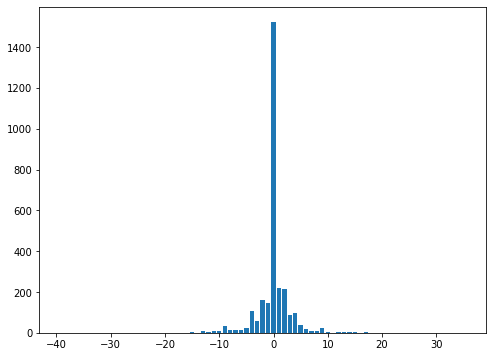

In [98]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

x,y = np.unique(diffs, return_counts=True)
x = sorted(x)

ax.bar(x,y)

plt.show()

In [99]:
diff_array = np.array(diffs)
diff_array.mean()
# This matches with the book solution mean

0.05636743215031315

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [84]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

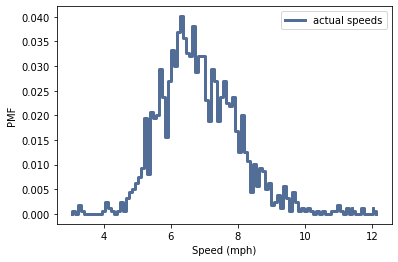

In [85]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [86]:
# Solution goes here

In [87]:
# Solution goes here